<a href="https://colab.research.google.com/github/elmedianikhadija/pfe_prophet/blob/main/prophet_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#libraries
import pandas as pd # manupilate the data

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

import folium 
from folium import plugins

In [4]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from prophet import Prophet

In [6]:
!pip install pandas
!pip install numpy
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [8]:
Confirmed_df = pd.read_csv("/content/infected5.csv") 

Confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110


In [9]:
Confirmed_df=Confirmed_df.drop(columns=['Lat', 'Long', 'Province/State'])
Confirmed_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008
1,Albania,0,0,0,0,0,0,0,0,0,...,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922
2,Algeria,0,0,0,0,0,0,0,0,0,...,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204
3,Andorra,0,0,0,0,0,0,0,0,0,...,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586
4,Angola,0,0,0,0,0,0,0,0,0,...,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189
280,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,Yemen,0,0,0,0,0,0,0,0,0,...,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022
282,Zambia,0,0,0,0,0,0,0,0,0,...,185649,186279,187602,188573,189731,190615,191527,192071,192316,192956


In [10]:
Confirmed_df = Confirmed_df.groupby(by='Country/Region').aggregate(np.sum).T
Confirmed_df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/23/21,143439,132828,159563,14498,41629,0,1277,4827973,228382,32753,...,380151,122786,4,296863,86957,315968,0,7003,190615,95686
7/24/21,143666,132853,160868,14498,41736,0,1280,4839109,228632,32918,...,380311,123559,4,298804,94913,315968,0,7008,191527,97277
7/25/21,143871,132875,162155,14498,41780,0,1280,4846615,228798,33082,...,380431,124290,4,299822,101173,316088,0,7012,192071,97894
7/26/21,144285,132891,163660,14577,41879,0,1280,4859170,228910,33266,...,380584,124995,4,300919,106347,316088,0,7012,192316,99944


In [11]:
#Confirmed_df.to_csv("infected_df_Morocco.csv", index=False)

In [12]:
Confirmed_df.index.name = 'Date'
Confirmed_df =Confirmed_df.reset_index()

In [13]:
Confirmed_df.tail(1000)

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,7/23/21,143439,132828,159563,14498,41629,0,1277,4827973,228382,...,380151,122786,4,296863,86957,315968,0,7003,190615,95686
549,7/24/21,143666,132853,160868,14498,41736,0,1280,4839109,228632,...,380311,123559,4,298804,94913,315968,0,7008,191527,97277
550,7/25/21,143871,132875,162155,14498,41780,0,1280,4846615,228798,...,380431,124290,4,299822,101173,316088,0,7012,192071,97894
551,7/26/21,144285,132891,163660,14577,41879,0,1280,4859170,228910,...,380584,124995,4,300919,106347,316088,0,7012,192316,99944


In [24]:
#Confirmed_df.to_csv("infected_df2_Morocco.csv", index=False)

In [14]:
Confirmed_df["Date"] = pd.to_datetime(Confirmed_df['Date'], dayfirst=True)
Confirmed_df["Date"].dtype

dtype('<M8[ns]')

In [15]:
Confirmed_df.head(1000)

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2021-07-23,143439,132828,159563,14498,41629,0,1277,4827973,228382,...,380151,122786,4,296863,86957,315968,0,7003,190615,95686
549,2021-07-24,143666,132853,160868,14498,41736,0,1280,4839109,228632,...,380311,123559,4,298804,94913,315968,0,7008,191527,97277
550,2021-07-25,143871,132875,162155,14498,41780,0,1280,4846615,228798,...,380431,124290,4,299822,101173,316088,0,7012,192071,97894
551,2021-07-26,144285,132891,163660,14577,41879,0,1280,4859170,228910,...,380584,124995,4,300919,106347,316088,0,7012,192316,99944


In [55]:
#Confirmed_df.to_csv("infected_df3_Morocco.csv", index=False)

# Prophet Morocco

In [56]:
#mycolumns_Morocco = ['Date','Morocco'] 

In [57]:
#infected_Morocco = Confirmed_df[mycolumns_Morocco]

In [ ]:
#infected_Morocco

In [ ]:
#infected_Morocco['Date'] = pd.to_datetime(infected_Morocco['Date'])
#infected_Morocco.columns = ['ds', 'y']

In [ ]:
#infected_Morocco

In [96]:
#infected_Morocco.to_csv("infected_MoroccoDS.csv", index=False)

In [16]:
infected_MoroccoFIN = pd.read_csv("/content/MOROCCO_infected.csv") 
infected_MoroccoFIN = infected_MoroccoFIN[0:537]

In [17]:
infected_MoroccoFIN

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
532,2021-07-07,537253
533,2021-07-08,538589
534,2021-07-09,539839
535,2021-07-10,541405


In [18]:
model_Morocco	 = Prophet()
model_Morocco	.fit(infected_MoroccoFIN)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ngjqo1a/shy0dtc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ngjqo1a/5lglisk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68961', 'data', 'file=/tmp/tmp1ngjqo1a/shy0dtc0.json', 'init=/tmp/tmp1ngjqo1a/5lglisk9.json', 'output', 'file=/tmp/tmpgk3ezjmb/prophet_model-20220816144117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
future_Morocco	 = model_Morocco	.make_future_dataframe(periods=15)
forecast_Morocco	 = model_Morocco	.predict(future_Morocco)

In [20]:
forecast_Morocco[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1000)

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-278.030987,-2125.503519,1588.227866
1,2020-01-23,22.938518,-1759.898771,2001.897234
2,2020-01-24,142.404887,-1909.849441,2182.756766
3,2020-01-25,262.533549,-1525.213933,2184.999168
4,2020-01-26,181.644216,-1508.924521,2050.862471
...,...,...,...,...
543,2021-07-22,540208.400918,537532.177630,542799.473840
544,2021-07-23,540695.771685,537964.070708,543655.260235
545,2021-07-24,541183.804745,538257.523166,544468.636042
546,2021-07-25,541470.819809,538302.118026,545043.820781


In [43]:
#forecast_Morocco.to_csv("forecast_Morocco_Morocco.csv", index=False)

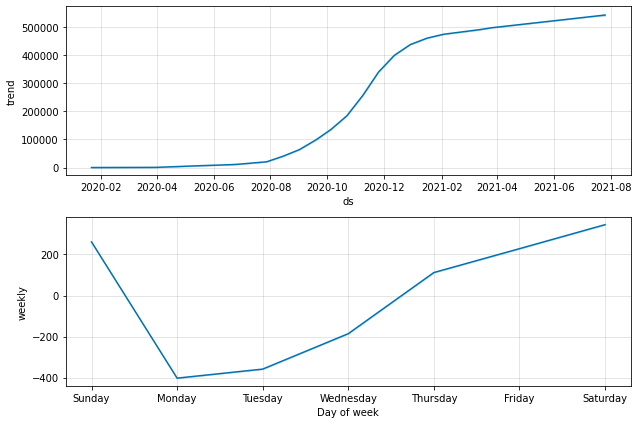

In [21]:
confirmed_forecast_plot = model_Morocco.plot_components(forecast_Morocco)

In [71]:
#forecast_Morocco.to_csv("forecast_Morocco.csv", index=False)

In [45]:
#infected_MoroccoFIN2 = pd.read_csv("/content/MOROCCO_infected.csv") 

In [ ]:
#infected_MoroccoFIN2

In [47]:
#infected_MoroccoFIN2 = infected_MoroccoFIN2[0:537]

In [ ]:
#infected_MoroccoFIN2

In [ ]:
#mb = Prophet(interval_width=0.80)
#mb.fit(infected_MoroccoFIN2)
#infected_MoroccoFIN2future = mb.make_future_dataframe(periods=15)
#infected_MoroccoFIN2future

In [ ]:
#forecast = mb.predict(infected_MoroccoFIN2future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1000)

# Prophet Algeria

In [28]:
#mycolumns_Algeria = ['Date','Algeria'] 

In [29]:
#infected_Algeria = Confirmed_df[mycolumns_Algeria]

In [ ]:
#infected_Algeria

In [ ]:
#infected_Algeria['Date'] = pd.to_datetime(infected_Algeria['Date'])
#infected_Algeria.columns = ['ds', 'y']

In [ ]:
#infected_Algeria

In [34]:
#infected_Algeria.to_csv("infected_Algeria_ds.csv", index=False)

In [22]:
infected_Algeria = pd.read_csv("/content/infected_AlgeriaFIN.csv") 

infected_Algeria = infected_Algeria[0:537]

In [23]:
infected_Algeria

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
532,2021-07-07,143032
533,2021-07-08,143652
534,2021-07-09,144483
535,2021-07-10,145296


In [24]:
model_Algeria = Prophet()
model_Algeria.fit(infected_Algeria)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ngjqo1a/3orhvqj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ngjqo1a/9f4revq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54052', 'data', 'file=/tmp/tmp1ngjqo1a/3orhvqj8.json', 'init=/tmp/tmp1ngjqo1a/9f4revq8.json', 'output', 'file=/tmp/tmpfzk9d5dm/prophet_model-20220816144232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
future_Algeria = model_Algeria.make_future_dataframe(periods=15)
forecast_Algeria = model_Algeria.predict(future_Algeria)

In [26]:
forecast_Algeria[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1000)

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-12,-58.530861,-1075.204258,983.639087
1,2020-01-22,-81.852764,-1120.720909,881.381756
2,2020-01-23,-61.081608,-1048.928632,1034.506279
3,2020-01-24,-40.957836,-1106.660876,998.665648
4,2020-01-25,-36.348989,-1084.321121,966.159220
...,...,...,...,...
547,2021-07-22,143650.386062,142520.790999,144936.816881
548,2021-07-23,143915.119166,142775.956857,145182.889838
549,2021-07-24,144164.337344,143013.432886,145501.853746
550,2021-07-25,144418.024560,143223.759501,145888.149223


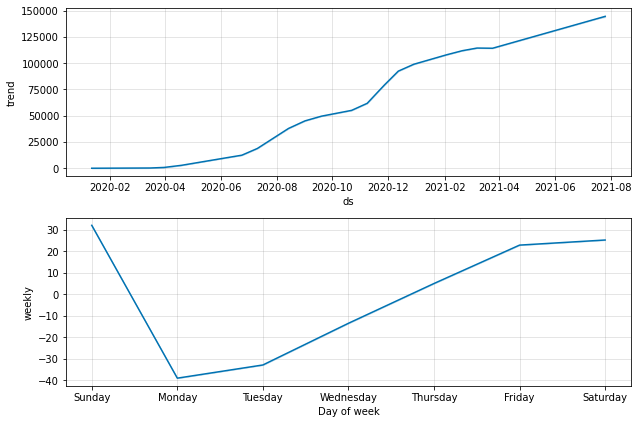

In [38]:
confirmed_forecast_plot = model_Algeria.plot_components(forecast_Algeria)

# Prophet Egypt

In [30]:
#mycolumns_Egypt	 = ['Date','Egypt'] 

In [31]:
#infected_Egypt	 = Confirmed_df[mycolumns_Egypt	]

In [ ]:
#infected_Egypt

In [ ]:
#infected_Egypt	['Date'] = pd.to_datetime(infected_Egypt	['Date'])
#infected_Egypt	.columns = ['ds', 'y']

In [ ]:
#infected_Egypt

In [36]:
#infected_Egypt.to_csv("infected_Egypt.csv", index=False)

In [27]:
infected_Egypt = pd.read_csv("/content/infected_EgyptFIN.csv") 

infected_Egypt 

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
548,2021-07-23,283947
549,2021-07-24,283985
550,2021-07-25,284024
551,2021-07-26,284059


In [28]:
infected_Egypt = infected_Egypt[0:537]

In [29]:
infected_Egypt

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
532,2021-07-07,282582
533,2021-07-08,282737
534,2021-07-09,282864
535,2021-07-10,282985


In [30]:
model_Egypt	 = Prophet()
model_Egypt	.fit(infected_Egypt)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ngjqo1a/93cvnokz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ngjqo1a/3r8nj3dk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85772', 'data', 'file=/tmp/tmp1ngjqo1a/93cvnokz.json', 'init=/tmp/tmp1ngjqo1a/3r8nj3dk.json', 'output', 'file=/tmp/tmpyjacj2y2/prophet_model-20220816144320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
future_Egypt		 = model_Egypt		.make_future_dataframe(periods=15)
forecast_Egypt		 = model_Egypt		.predict(future_Egypt	)

In [32]:
forecast_Egypt[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1000)

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-233.017204,-2504.308948,1868.244627
1,2020-01-23,-233.885112,-2400.728574,1964.617195
2,2020-01-24,-241.345344,-2466.090494,1980.585528
3,2020-01-25,-261.827611,-2396.410667,1944.353978
4,2020-01-26,-280.315594,-2479.631876,1911.882407
...,...,...,...,...
547,2021-07-22,303785.284856,301306.346270,306249.489043
548,2021-07-23,304661.973400,302240.740419,307114.244644
549,2021-07-24,305525.639908,302787.811464,308273.118638
550,2021-07-25,306391.300700,303589.764274,309030.805199


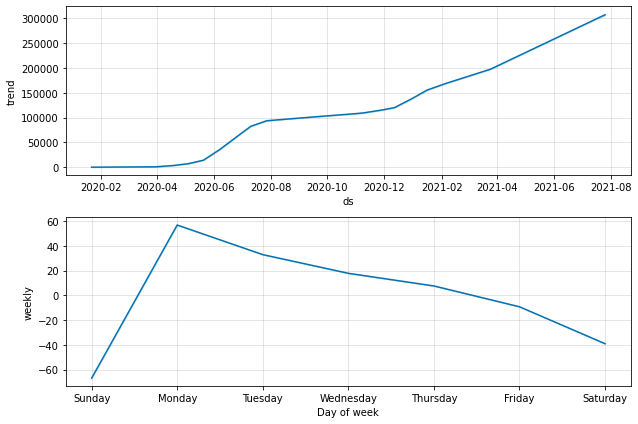

In [39]:
confirmed_forecast_plot = model_Egypt.plot_components(forecast_Egypt)

# Prophet Libya

In [15]:
#mycolumns_Libya	 = ['Date','Libya']

In [16]:
#infected_Libya	 = Confirmed_df[mycolumns_Libya]

In [ ]:
#infected_Libya

In [ ]:
#infected_Libya	['Date'] = pd.to_datetime(infected_Libya	['Date'])
#infected_Libya	.columns = ['ds', 'y']

In [ ]:
#infected_Libya

In [20]:
#infected_Libya.to_csv("infected_Libya.csv", index=False)

In [33]:
infected_Libya = pd.read_csv("/content/infected_LibyaFIN.csv") 
infected_Libya = infected_Libya[0:537]
infected_Libya 

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
532,2021-07-07,198142
533,2021-07-08,199526
534,2021-07-09,201236
535,2021-07-10,201236


In [34]:
model_Libya	 = Prophet()
model_Libya.fit(infected_Libya)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ngjqo1a/ov1flo33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ngjqo1a/4lraogh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89363', 'data', 'file=/tmp/tmp1ngjqo1a/ov1flo33.json', 'init=/tmp/tmp1ngjqo1a/4lraogh6.json', 'output', 'file=/tmp/tmp4x_mg4oz/prophet_model-20220816144610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
future_Libya	 = model_Libya.make_future_dataframe(periods=15)
forecast_Libya	 = model_Libya.predict(future_Libya)

In [37]:
forecast_Libya[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1000)

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-23.446087,-1685.834735,1480.974418
1,2020-01-23,1.444820,-1660.892275,1499.182853
2,2020-01-24,60.805193,-1560.409909,1751.234200
3,2020-01-25,-218.764596,-1862.651796,1328.982878
4,2020-01-26,-81.745223,-1758.796628,1747.412462
...,...,...,...,...
547,2021-07-22,204735.582651,202901.423314,206487.300673
548,2021-07-23,205167.788696,203349.293258,207004.679293
549,2021-07-24,205261.064579,203353.275378,207040.593491
550,2021-07-25,205770.929624,203866.567094,207666.676747


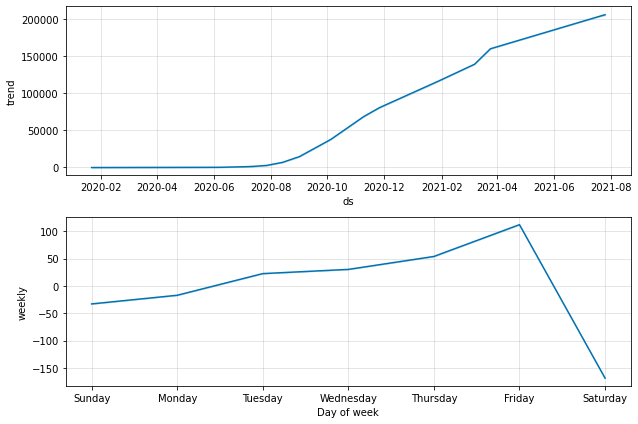

In [40]:
confirmed_forecast_plot = model_Libya.plot_components(forecast_Libya)